# Proyecto Final de Temas Selectos de Biomatemáticas
### Aceves Olguín Grecia

# Introducción
A lo largo de la historia de la humanidad, la música siempre ha sido una importante representación de la emoción, vivencia y estado humano. El receptor encuentra en ella un sin fin de emociones al escucharla, sin embargo, desde el siglo pasado la psicología ha estudiado la recepción de la música y la identificación de las emociones que produce o emite en las personas. 

El reconocimiento de emociones musicales MER (Music Emotion Recognition), es un área de estudio que se centra en la identificación, asignación de las emociones percibidas. Se entiende como emoción al estado anímico a corto plazo producido por estímulos. Se estudian las emociones percibidas porque las emociones experimentadas se encuentran a un nivel más individual y subjetivo de cada persona, lo que dificultaría su análisis a gran escala. 

La investigación del MER ha ido creciendo a la par de la ascendente base de datos musical y el desarrollo de modelos computacionales. En general el abordaje en la metodología se divide en MER categórico y MER dimensional (o una combinación de ambos). El MER categórico en el cual se enfoca el proyecto se trata de predecir en clases discretas la etiqueta de las piezas musicales, mientras que el MER dimensional se enfoca en las dimensiones numéricas de ciertas características musicales (2). Los principales modelos utilizados para el caso categórico son:  

- Análisis cuadrático discriminante (QDA) 

- Vecino K más cercano (KNN), árbol 

- Bosque aleatorio (RF)  

- Empaquetado (Bag) 

- Refuerzo (Boost) 

- Máquina de vectores de soporte con núcleo radial (SVM-R) 

- Máquina de vectores de soporte con núcleo polinomial (SVM-P)  

- Máquina de vectores de soporte con núcleo lineal (SVM-L), L1-LR, L2-LR, L1-SVM, L2-SVM  

- Análisis discriminante regularizado de centroides reducidos (SCRDA) (1) 

La ciencia de datos es la principal disciplina involucrada, aunque a su vez se necesita en ciertos casos conocimientos en teoría musical, psicología y medicina. Tiene diversas aplicaciones, principalmente ayuda en el desarrollo de sistemas de "recomendación", en la composición musical automatizada, en la clasificación y más.   

# Objetivo 

El objetivo del proyecto es utilizar el algoritmo de bosque aleatorio implementado en python en un proceso de MER. 

El proceso que se eligió consiste en clasificar canciones basándose en su letra (lyrics) entre canciones felices(happy) y canciones tristes (sad).  

Se espera que dada una base de datos de canciones con su nombre (Title), artista (Artist) y estado de emoción (Mood) se obtenga la característica extra central, la letra (Lyrics), de una página HTML.  A través de todo el análisis de la base modificada y su entrenamiento en el modelo se espera una eficacia aceptable (mayor al 70%) al probar el modelo en la data guardada para esta evaluación. 

# Desarrollo

## Análisis Exploratorio de Datos 

La base de datos que contiene la información de las piezas musicales y su categoría se obtuvo de un artículo publicado por dos profesores de la Universidad Politécnica de Turin en Italia, los cuales usaron el modelo de valencia-excitación de Russell con 4 estados de ánimo para etiquetar las canciones "Los valores de valencia y excitación de las canciones se calculan sumando los valores correspondientes de cada palabra de la letra que se encuentra en un léxico que construimos combinando ANEW (Norma de efecto de las palabras en inglés), WordNet y WordNet-Affect"(1). Posteriormente evaluaron los resultados con otras bases de datos donde las etiquetas fueron hechas por humanos "utilizamos un conjunto de datos de letras anotadas con juicio humano subjetivo... El proceso de evaluación revela una precisión lograda de 74,25 %" 

Decidí usar esta base, ya que la recopilación de la base de datos de MER es difícil y poco accesible, la mayoría contiene menos de 1000 canciones y se utiliza para el uso propio por lo que no es de libre acceso. 

Es sumamente importante mencionar que la base carece de las letras, así que para agregarlas se utilizó una paquetería que las obtiene de Genius Lyrics junto con un ciclo que las va agregando a la base, sin embargo, el proceso de ejecución fue muy tardado y **se recomienda altamente utilizar la base de datos resultante de este proceso que se encuentra en la sección de data con el nombre: lyricsCompleto.xlsx** en vez de ejecutarlo de nuevo. Con esto en mente, el análisis de datos se llevó a cabo en dos fases, primero en la base original y después en la resultante de agregar las letras. 

### EDA 
En esta parte realizaremos un analisis del problema y objetivos.

-**Definición del problema**: El problema que se busca resolver es la clasificación de canciones en las emociones "happy" y "sad" a través de su letra(lyrics). Gracias a esto identificamos que la variable target es "Mood" la etiqueta de emoción en la base, mientras que la letra es la variable en la que nos basaremos para categorizar estas canciones.

-**Objetivos**: Filtrar la base de datos MoodyLyrics para obtener solo los registros eriquetados como "happy" o "sad", agregar a la base filtrada las letras de las canciones, realizar un análisis exploratorio de la base obtenida, identificar los valores nulos y repetidos para despues decidir su abordaje (eliminarlos, imputar), preparar los datos para su implementación en el modelo, descripción del modelo y justificación, implementación del modelo, resultados con evaluación y conclusiones.

-**Alcance**: El proyecto realizara todos los objetivos descritos en el punto anterior, pero faltará la prueba del modelo con otras bases de datos, en especial con una creada por humanos.



### Análisis y preparación de la base MoodLyrics

In [1]:
#Libreria para manejar y cargar el Dataframe
import pandas as pd
#Libreria para usar herramientas matematicas
import numpy as np
#Libreria para graficas
import matplotlib.pyplot as plt
#Libreria para la transformacion usando TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Libreria para el modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
#Libreria para dividir la database en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#libreria para evaluar el modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#Libreria que nos ayudara a visualizar uno de los arboles en nuestro bosque
from sklearn import tree

In [2]:
#Importamos el Dataframe MoodyLyrics y obtenemos los primeros 20 registros
Data = pd.read_excel("ml_raw.xlsx")
Data.head(20)

,MoodyLyrics: A music dataset annotated in 4 categories based on Valence and Arousal values of lyrics words,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,Created by:,NaN,NaN,NaN
2,Erion Çano (erion.cano@polito.it),NaN,NaN,NaN
3,"Polytechnic University of Turin, Department of...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,Citation and further information:,NaN,NaN,NaN
6,"Çano, E.; Morisio, M. “MoodyLyrics: A Sentimen...",NaN,NaN,NaN
7,"Intelligent Systems, Metaheuristics & Swarm In...",NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,All song lyrics were collected from lyrics.wik...,NaN,NaN,NaN


In [3]:
#Renombramos las columnas
Data= Data.rename(columns={"Unnamed: 1":"Artist", "Unnamed: 2":"Title","Unnamed: 3":"Mood"})
#Quitamos la primer columna y las primeras 15 filas ya que es la información adicional 
Data=Data.iloc[15:,1:]
Data.reset_index(drop=True, inplace=True)
Data.head(20)

,Artist,Title,Mood
0,Usher,There Goes My Baby,relaxed
1,Da'Ville,On My Mind,relaxed
2,Rihanna,Rockstar 101,relaxed
3,J. Holiday,Bed,relaxed
4,Morgan Heritage,Don't Haffi Dread,angry
5,Whitney Houston,My Love Is Your Love,happy
6,Serani,Study People,angry
7,Austra,Spellwork,angry
8,Coro,Can't Let You Go,happy
9,Beenie Man,Slam,relaxed


Antes de filtrar los datos y agregar el lyric, haremos una gráfica de pastel por emoción y un análisis de los datos 

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  2595 non-null   object
 1   Title   2595 non-null   object
 2   Mood    2595 non-null   object
dtypes: object(3)
memory usage: 60.9+ KB


In [5]:
#Descripcion de los datos
Data.describe(include='object')

,Artist,Title,Mood
count,2595,2595,2595
unique,1672,2229,4
top,The Beatles,Silent Night,happy
freq,52,24,819


In [6]:
#Identificamos los datos que tengan nulos
Data.isnull().sum()

Artist    0
Title     0
Mood      0
dtype: int64

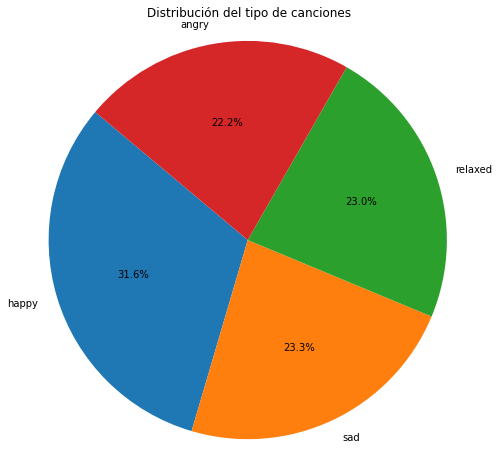

In [7]:
# Contar la frecuencia de cada valor en la columna
counts = Data['Mood'].value_counts()
# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del tipo de canciones')
plt.axis('equal')
plt.show()

La data cuenta con 2595 datos (todos de tipo string), sin datos nulos y con una distribución equilibrada (casi 1/4 para cada una) de canciones en cada tipo emoción, el proyecto pretende clasificar solo las canciones felices y tristes así que filtramos la base.

In [8]:
#Ahora antes de agregar los lyrics quitamos las canciones que no sean felices o tristes
Data=Data.loc[Data['Mood'].isin(['happy', 'sad'])]
#Reiniciar los indices en 0
Data.reset_index(drop=True, inplace=True)

Para agregar los lyrics usamos una paquetería llamada lyricsgenius (3), la cual accede a la API de Genius Lyrics con nuestro TOKEN personal (debemos generarlo) y obtiene la letra de una canción dado su nombre y artista principal

In [9]:
#Necesitamos instalar lyricsgenius usando pip install lyricsgenius (requiere python3)
#!pip install lyricsgenius
#Cargamos la libreria
import lyricsgenius
#'OL3oZWWLJhC8UgFIpIoLgSCghN0uWelmlGxsDloSKj2Zis44A9vueKAXEfJp5Yu9' es el TOKEN generado para el proyecto y Github 
#Se puede utilizar su propio TOKEN
genius = lyricsgenius.Genius('OL3oZWWLJhC8UgFIpIoLgSCghN0uWelmlGxsDloSKj2Zis44A9vueKAXEfJp5Yu9');
# Desactiva los mensajes de estado (como "serching..." o "done")  
genius.verbose = False
# Elimina los encabezados de sección de las letras (por ejemplo, [Chorus] [Verse]..etc.)
genius.remove_section_headers = True

Ahora creamos la función que nos da los lyrics y la probamos 

In [10]:
#Crearemos una funcion usando este paquete
#Recibe dos strings, la primera el nombre del artista y la segunda el nombre de la cancion
def lyrics(artista, cancion):
    lyrics=genius.search_song(cancion, artista);
    if lyrics is None:
        return None
    else:
        return lyrics.lyrics  

In [11]:
#Probemos que funciona con alguno de nuestros registros
print(lyrics(Data.iloc[0,0], Data.iloc[0,1]))

22 ContributorsMy Love Is Your Love Lyrics
Clap your hands, y'all, it's alright
(Turn me up, turn me up, turn me up)
Clap your hands, y'all, it's alright
Clap your hands, y'all, it's alright
Clap your hands, y'all, it's alright (Oh)

If tomorrow is Judgement Day (Sing, mommy)
And I'm standing on the front line, mm
And the Lord ask me what I did with my life
I will say I spent it with you
Clap your hands, y'all, it's alright (It's alright)
Clap your hands, y'all, it's alright

If I wake up in World War 3 (World War 3)
(In World War 3)
I see destruction and poverty
And I feel like I wanna go home
It's okay (It's okay) if you're comin' with me
Clap your hands, y'all, it's alright (It's alright)
Clap your hands, y'all, it's alright
Clap your hands, y'all, it's alright

'Cause your love is my love
And my love is your love
It would take an eternity to break us
And the chains of Amistad couldn't hold us
'Cause your love is my love
And my love is your love
It would take an eternity to break us

Ahora agregamos a la base los datos de la letra usando la función que creamos, **es aquí donde recomendamos saltarse la ejecución de las siguientes líneas e ir directamente a la carga de datos con el resultado de esta ejecución: lyricsCompleto.xlsx** ya que el tiempo de espera fue demasiado.

In [ ]:
#Agregamos una columna del mismo tamanio que nuestro data donde se guardaran nuestros lyrics
x = np.arange(len(Data))
Data['Lyrics'] = x


In [ ]:
#Agregamos los lyrics
genius.timeout = 15  
for i in range(len(Data)):
    Data.loc[i,'Lyrics']=lyrics(Data.iloc[i,0], Data.iloc[i,1]);
#Tuvimos que aumentar el tiempo de carga, de lo contrario arrojaba error, con esto el tiempo de carga fue de aprox. 15min

In [ ]:
#Guardamos el dataframe para no tener que guardar los lyrics cada vez
Data.to_excel('lyricsCompleto.xlsx', index=False)

### Análisis de la base lyricsCompleto 

In [12]:
#Cargamos la data guardada
Data = pd.read_excel("lyricsCompleto.xlsx")

Haremos un análisis de la cantidad de registros resultantes de la filtración, de la distribución de las emociones en la base y de los elementos nulos.

In [13]:
#Identificamos los nulos y en este caso los eliminamos porque no podemos imputar 
Data.isnull().sum()*100/Data.count()

Artist    0.000000
Title     0.000000
Mood      0.000000
Lyrics    1.209104
dtype: float64

La base cuenta con un 1.2% de datos nulos en la columna Lyrics

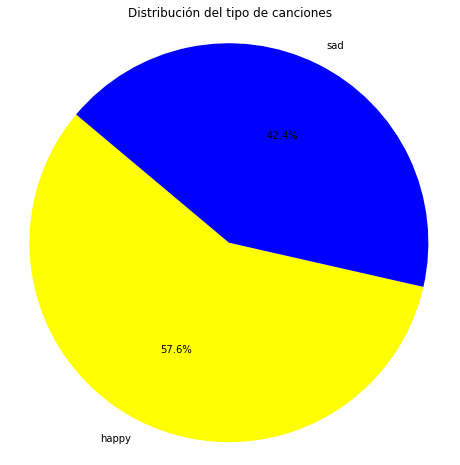

In [14]:
# Contar la frecuencia de cada valor en la columna
counts = Data['Mood'].value_counts()
# Crear la gráfica de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, colors = ['yellow', 'blue'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución del tipo de canciones')
plt.axis('equal') 
plt.show()

Al filtrar los datos, la distribución entre canciones felices y tristes es bastante equilibrada y no tendremos problemas de tener datos insuficientes de cierto tipo de canción que llevarían a un sesgo y posible mal entrenamiento del modelo.

In [15]:
#Descripcion de los datos
Data.describe(include='object')

,Artist,Title,Mood,Lyrics
count,1423,1423,1423,1406
unique,1031,1226,2,1328
top,The Beatles,Have Yourself A Merry Little Christmas,happy,"Happy Christmas, Kyoko Happy Christmas, Julian..."
freq,29,14,819,4


La base resultante de la filtración cuenta con 1423 registros de los cuales: 

- 1031 artistas diferentes 

- 1226 nombres de canciones distintas 

- 2 etiquetas de emoción, la más frecuente "happy"  

- 1328 letras distintas 

Hay menos títulos de canciones únicas que letras, y se debe a que las canciones pueden tener el mismo nombre, pero ser de diferente artista y tener letra distinta. 

  

Como podemos ver, el título de canción que más se repite es el de "Have Yourself a Merry Little Christmas" pero como veremos a continuación eso no implica que la letra sea la misma. 

In [16]:
#identificamos los registros con este titulo de cancion
Data[Data['Title']=='Have Yourself A Merry Little Christmas']

,Artist,Title,Mood,Lyrics
706,Matt Brouwer,Have Yourself A Merry Little Christmas,happy,A serious discussion concerning the use and va...
914,Israel & New Breed,Have Yourself A Merry Little Christmas,happy,Christmas future is far away Christmas past is...
917,Frank Sinatra,Have Yourself A Merry Little Christmas,happy,Have yourself a merry little Christmas Let you...
920,The Carpenters,Have Yourself A Merry Little Christmas,happy,"""Jingle Bells"" - Duke Ellington ""When There's ..."
922,James Taylor,Have Yourself A Merry Little Christmas,happy,"Christmas future is far away, Christmas past i..."
925,Coldplay,Have Yourself A Merry Little Christmas,happy,Have yourself a merry little Christmas Let you...
931,The Jackson 5,Have Yourself A Merry Little Christmas,happy,Have yourself a merry little Christmas Let you...
937,Jane Monheit,Have Yourself A Merry Little Christmas,happy,Have yourself A merry little Christmas Let you...
949,Ledisi,Have Yourself A Merry Little Christmas,happy,Have yourself a merry little Christmas Let you...
958,Diana Krall,Have Yourself A Merry Little Christmas,happy,Have yourself a merry little Christmas Let you...


In [17]:
#Imprimimos dos de esos registros verificando que la letra es distinta
Data.loc[917, 'Lyrics']

'Have yourself a merry little Christmas Let your heart be light From now on, our troubles will be out of sight  Have yourself a merry little Christmas (Merry little Christmas) Make the Yuletide gay (Make the Yuletide gay) From now on, our troubles will be miles away  Here we are as in olden days Happy golden days of yore Faithful friends who are dear to us Gather near to us once more  Through the years, we all will be together If the fates allow Hang a shining star upon the highest bough And have yourself a merry little Christmas now  Here we are as in olden days Happy golden days of yore Faithful friends who are dear to us Gather near to us once more You might also like Through the years, we all will be together If the fates allow Hang a shining star upon the highest bough And have yourself a merry little Christmas now  Merry Christmas, Merry Christmas4Embed'

In [18]:
Data.loc[922, 'Lyrics']

"Christmas future is far away, Christmas past is past Christmas present is here today bringing joy that may last Have yourself a merry little Christmas, may your heart be light In a year our troubles will be out of sight From now on, have yourself a merry little Christmas, make the yuletide gay In a year our troubles will be miles away Here we are as in olden days, happy golden days of yore Precious friends who are dear to us gather near to us once more I know that in a year we all will be together, if the Fates allow Until then, we'll just have to muddle through somehow And have ourselves a merry little Christmas now  Cause everybody knowsSee James Taylor LiveGet tickets as low as $18You might also likeEmbed"

Sin embargo, también está la opción de que los lyrics son iguales, pero de distintos artistas (covers), situación que no nos interesa tener debido a que la variable en la que nos basamos principalmente para entrenar el modelo es la letra. 

## Preparación de Datos

### Nulos
Gracias al análisis anterior sabemos que hay datos nulos en Lyrics, los cuales no imputaremos ya que el Lyrics es de tipo string con una alta cardinalidad y en la cual buscamos que no haya repetidos por lo que no nos conviene imputar con la moda, además los valores nulos son apenas el 1.2% de toda la base así que los eliminaremos. 

In [19]:
Data=Data.dropna()

### Redundancia
Como vimos antes, podemos tener el mismo nombre de la canción pero diferente letra. Queremos evitar tener letras iguales ya que es redundancia de datos para el modelo, aunque en la base sean registros distintos por ser covers y tener 
artistas distintos. Por eso se eliminarán los registros que tengan la letra (Lyrics) igual a otro registro(dejamos al primero).

In [20]:
#Solo borramos el 
Data=Data.drop_duplicates(subset=['Lyrics'])
Data.describe(include='object')

,Artist,Title,Mood,Lyrics
count,1328,1328,1328,1328
unique,1003,1191,2,1328
top,The Beatles,Have Yourself A Merry Little Christmas,happy,"Clap your hands, y'all, it's alright (Turn me ..."
freq,15,14,762,1


### Mapeos y preprocesamientos

Nuestras variables de interés son Mood y Lyrics, ambas de tipo string, para el uso del modelo necesitamos que las variables sean de tipo numérico. Para Mood, al ser de dimensión 2, elegimos transformarla a una variable tipo binaria con un mapeo. Guardaremos la transformaciones como y para la transformación de Mood (variable target). 

No consideramos el nombre de la canción ni el artista para el modelo debido a que comúnmente el nombre de la canción está presente en la letra de la misma y de no ser así, serian unas pocas palabras agregadas a comparación de las presentes en la letra. Considerar al artista tampoco tendría mucho significado porque un solo artista no es determinante en la emoción de su canción (en su mayoria), veamos el ejemplo de Elvis Presley que tiene la mitad de canciones en cada emoción (canciones en la base). 

In [21]:
#Canciones de Elvis Presley
Data[Data['Artist']=='Elvis Presley']

,Artist,Title,Mood,Lyrics
422,Elvis Presley,Jailhouse Rock,sad,The warden threw a party in the county jail Th...
517,Elvis Presley,Heartbreak Hotel,sad,"Well, since my baby left me Well, I found a ne..."
758,Elvis Presley,Love Me Tender,happy,"Love me tender, love me sweet Never let me go ..."
1125,Elvis Presley,For The Heart,happy,"Had a dream about you baby, had a dream about ..."


In [22]:
#Hacemos la transformación binaria
y=Data['Mood'].map({'happy': 0, 'sad': 1})

En el caso de lyrics, no podemos hacer un mapeo ni un one-hot encodig debido a la alta cardinalidad, la cual no podemos reducir (como se verá después) así que la transformación se dará por medio del algoritmo TF-IDF Vectorizer. 

El método TF-IDF Vectorizer asigna un "peso" a cada palabra/token presente en un texto/cadena denominada "corpus" con base en su frecuencia y la cantidad total que aparece en el corpus. De esta forma el algoritmo asigna un valor a la importancia de las palabras en el corpus. También considera los "stopwords", palabras que no aportan significancia al texto y que aparecen mucho como: la, los, y, en, a, o... etc.(en ingles: and, a, by,... ). El resultado será una matriz con entradas (texto,token)=peso, para cada token de cada texto se asignará un valor entre 0 y 1. 

La herramienta TfidfVectorizer realiza el siguiente proceso: 

1. Divide el texto en palabras individuales (tokens). 

2. Construye un vocabulario de palabras únicas encontradas en cada texto de entrenamiento. 

3. Calcula la puntuación TF-IDF para cada palabra en cada texto. 

Guardamos lo resultante como X 

In [23]:
#Creamos la instancia 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Data['Lyrics'])


Ambas "variables" quedan en términos numéricos y de hecho están normalizadas ya que tienen valores entre 0 y 1. Para el caso de bosques aleatorios no es necesaria la estandarización de los datos. 

### Reducción de dimensionalidad

Lyrics por si sola era una columna de alta cardinalidad ya que tiene 1330 datos únicos y con la vectorización pasa a ser una matriz de aún más alta cardinalidad, sin embargo, los métodos LDA y PCA se encargan de reducir esas dimensiones las cuales en la vectorización llevarían a una perdida importante de la información de algo tan complejo como lo es todo un texto. Debido a esto no debemos reducir la dimensionalidad.

## Modelado de Datos
Como se ha mencionado desde el inicio del documento, el modelo que se utilizará para resolver el problema es el de bosques de decisión debido a que en la investigación se encontró que es uno de los métodos utilizados en el MER para la clasificación de canciones, además es un modelo considerado "robusto" en el aspecto de aceptar una gran cantidad de características variadas para la decisión y separación de los datos, característica presentes en la letra de una canción después de ser vectorizada. 

# Propuesta de Solución 
La propuesta para solucionar la clasificación de canciones dependiendo su letra es utilizar el bosque aleatorio implementado en python con los datos preprocesados para después evaluar su eficacia. 

In [24]:
# Dividir el conjunto de datos en entrenamiento=80% y prueba=20%
#Fijamos la aleatoridad en 69
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [25]:
#Activamos el ajuste con 30 arboles para el bosque y una aleatoridad fija en 0
rf = RandomForestClassifier(n_estimators=30  , random_state=0)
# Entrenar el modelo
rf=rf.fit(X_train, y_train)

RandomForestClassifier crea 30 arboles de decisión cada uno con una muestra algo diferente de la dada para entrenar el modelo usando  bootstrapping. Despues evalúa todas las características(X) proporcionadas  y selecciona las que mejor separa los datos basándose en la ganancia de información. Para cada característica, se consideran diferentes umbrales de división para encontrar el que maximiza la ganancia de información.

Una vez seleccionada la característica y el umbral de división, se divide el conjunto de datos en dos subconjuntos: uno que cumple con la condición (a la izquierda del nodo) y otro que no la cumple (a la derecha del nodo). De esta forma sigue el proceso de manera recursiva para cada subconjunto de datos generados hasta que todos los datos en el nodo pertenecen a la misma clase (podemos cambiar el criterio de parada a un máximo de profundidad o un min/max de muestras en cada nodo).

# Resultados
Para la apreciación de los resultados del entrenamiento seleccionaremos uno de los árboles del bosque.

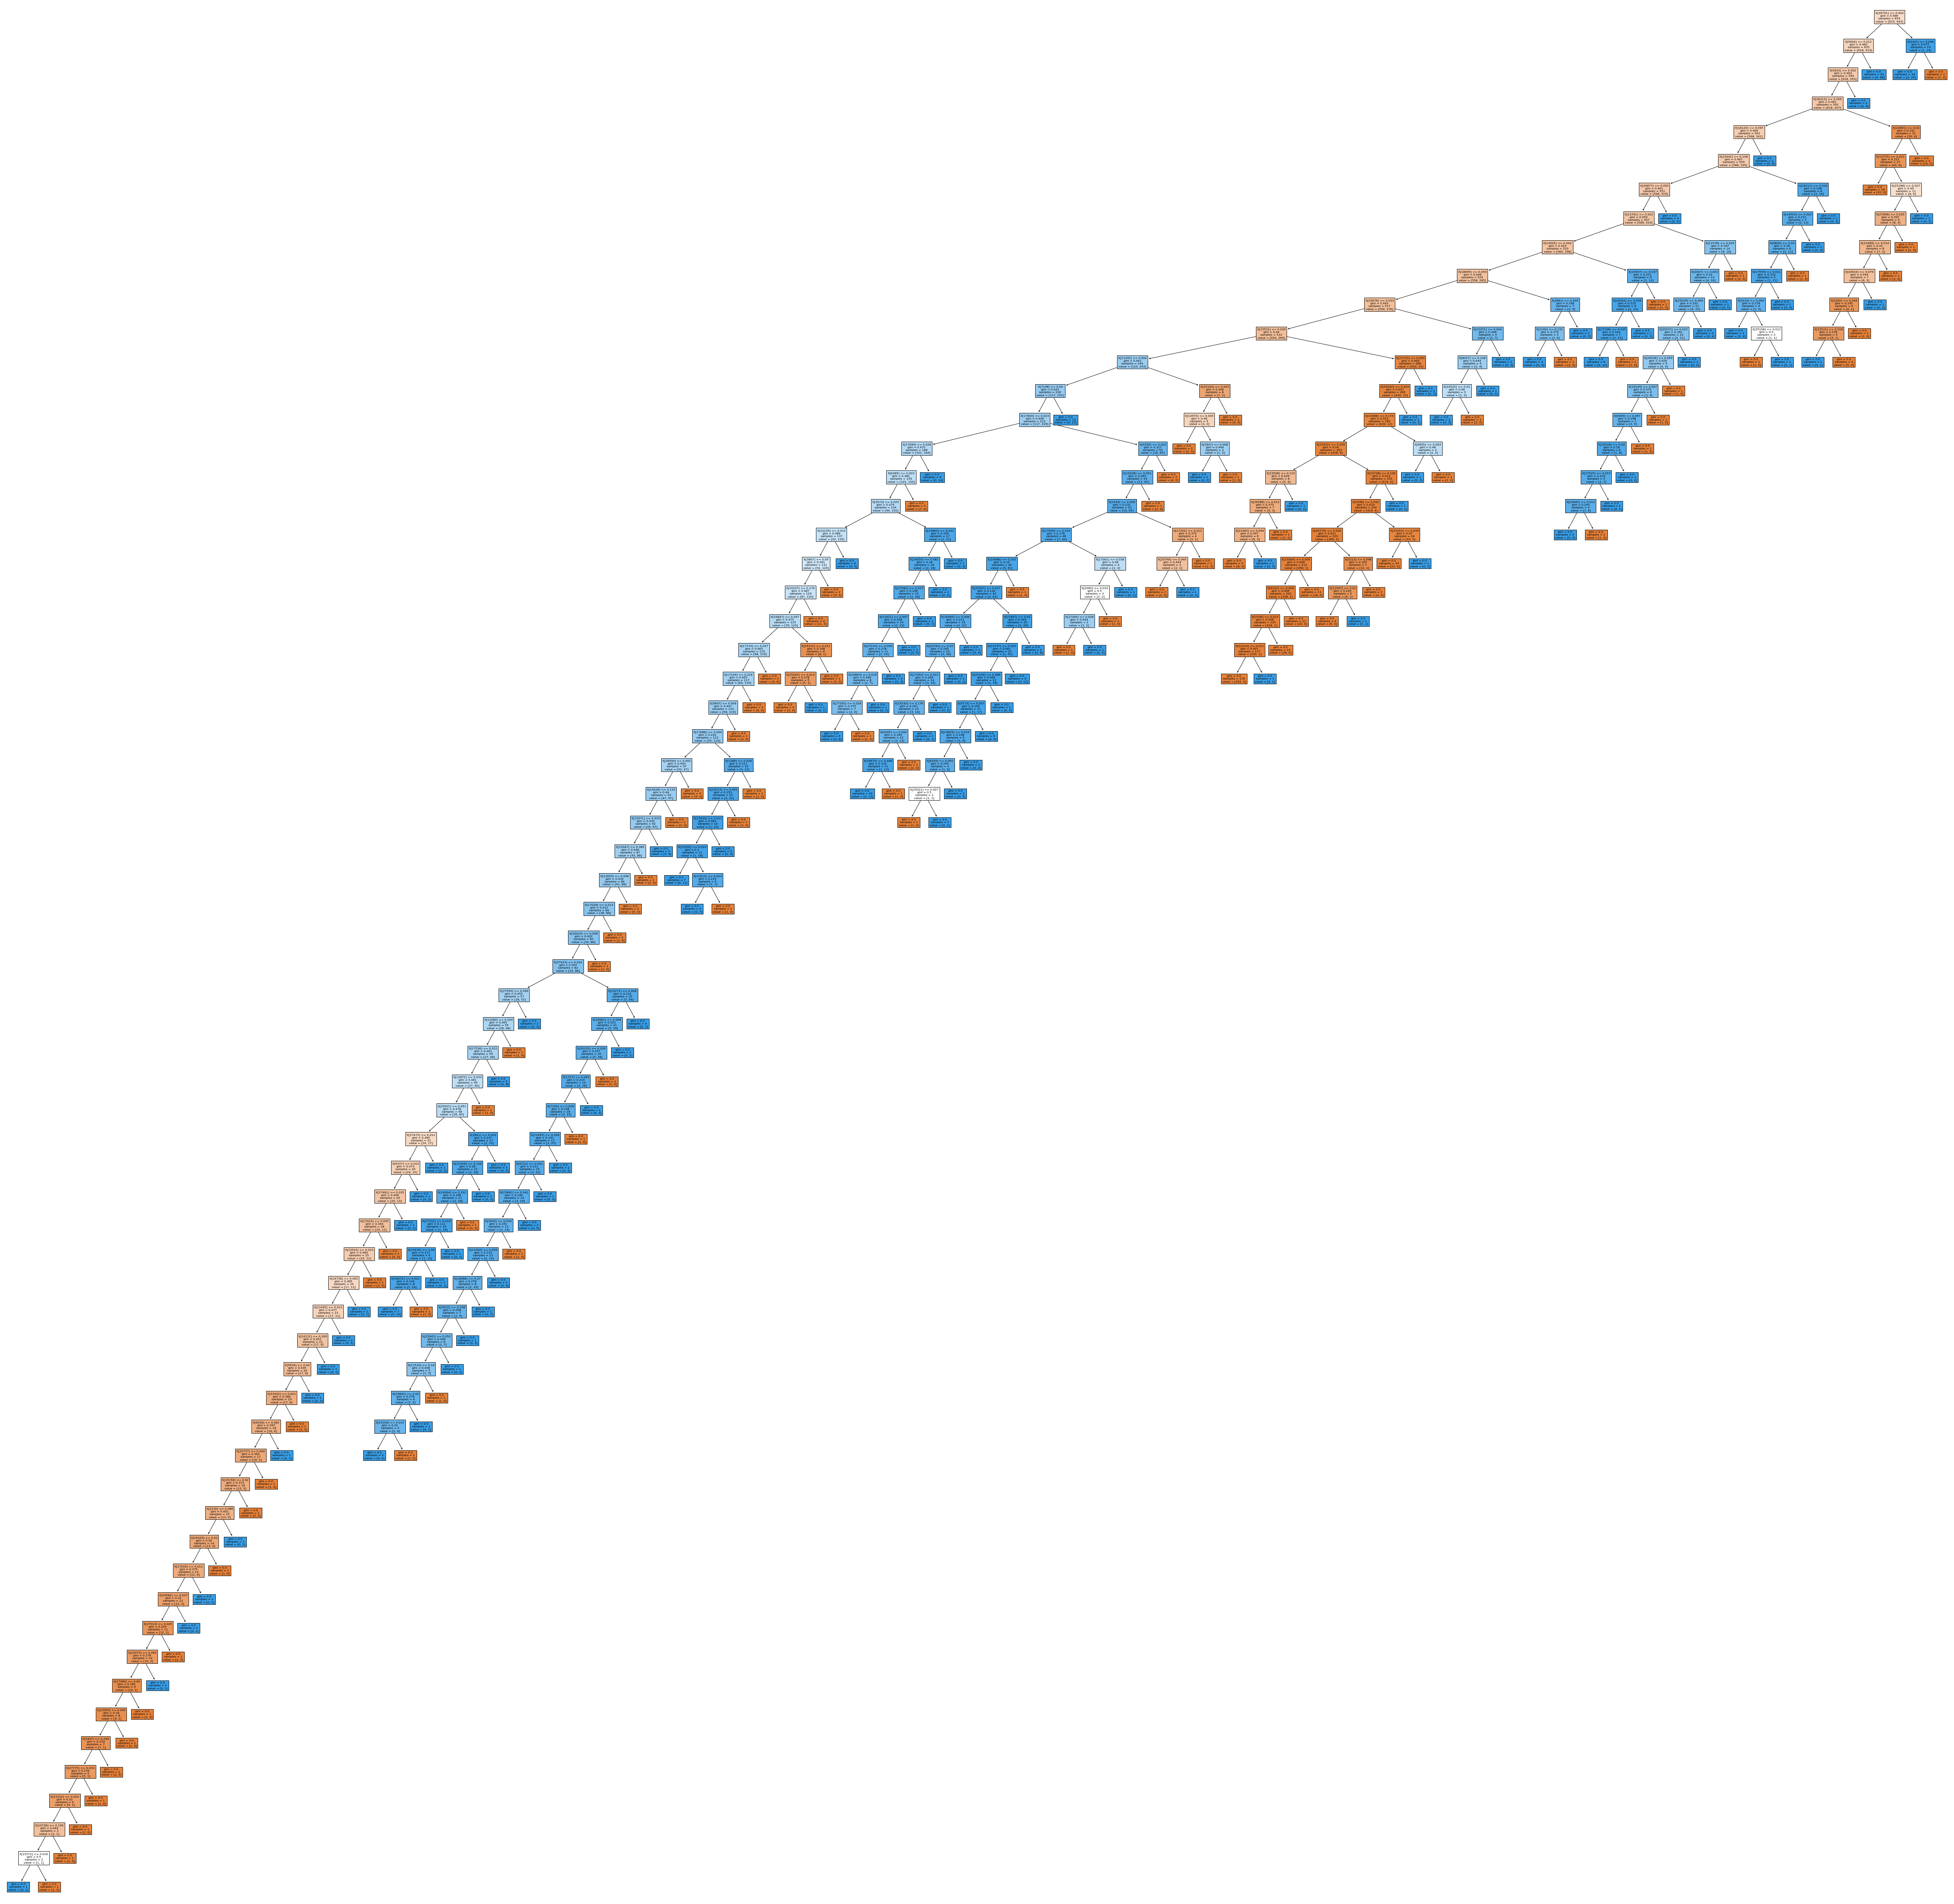

In [26]:
#Elegimos el 1er arbol
arbol = rf.estimators_[0]
#Graficamos
plt.figure(figsize=(90, 90))
tree.plot_tree(arbol, filled=True)
plt.show()

Haciendo zoom al inicio, nos arroja lo siguiente:

- X[26791] <= 0.002
- gini = 0.486
- samples = 654
- value = [619, 443]

Este cuadro indica la condición de división de la muestra, en el primer renglón con X[26791] se está evaluando si el valor de la característica en la posición 26791 (valor de la columna 26791) es menor o igual a 0.002. Si esta condición es verdadera para una observación, el flujo del árbol seguirá por la rama izquierda; de lo contrario, seguirá por la rama derecha.


Gini es una medida de la impureza de un nodo. En este caso, 0.486 es el valor del índice de Gini en este nodo. Cuanto más cercano sea este valor a cero, más puro será el nodo, lo que significa que contiene principalmente muestras de una sola clase, por eso se busca que los nodos finales tengan gini=0.

Samples indica el número de muestras que se encuentran en este nodo, mientras quevalue = [619, 443] indica la distribución de clases: 619 con 'happy' y 443 con 'sad

Así continua cada hasta que cada nodo contenga muestras de una sola clase

# Evaluación
Para la evaluación del modelo se utilizó la herramienta classification_report que nos proporciona 3 métricas para la evaluación del modelo: 

- Precisión: La precisión indica la proporción de predicciones correctas sobre el total de predicciones. 
- Recall: La proporción entre el total de muestras de una clase, con el total clasificadas correctamente en dicha clase.
- F1-Score:  El F1-score es una medida que combina precisión y recall en una sola métrica y refleja el desequilibrio de clases.

Como extra, accuray indica la proporción global de muestras clasificadas correctamente.

In [27]:
# Predecir las etiquetas con los datos de prueba
y_pred_rf = rf.predict(X_test)


In [28]:
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       152
           1       0.99      0.59      0.74       114

    accuracy                           0.82       266
   macro avg       0.87      0.79      0.80       266
weighted avg       0.86      0.82      0.81       266



La precisión global del modelo **accuracy** es del 82%, lo que significa que el 82% de las predicciones son correctas. Sin embargo, la precisión global puede ser sesgada por las clases, por ejemplo, que se clasificaran casi todas las muestras de una correctamente, mientras que se equivocó en muchos de la otra clase. Por eso es importante considerar las siguientes métricas: 

Estos resultados nos indican que el modelo: 

- **Precision**: Que el el 76% de las canciones clasificadas como "felices" son realmente "felices" y que el 99% de las canciones clasificadas como "tristes" son realmente "tristes" 

- **Recall**: Indica que del total de canciones "felices" se identificó el 99% de estas, mientras que, del total de canciones tristes, solo se identificó el 59%. 

- **F1-Score**: Esta medida combinada representa la eficacia conjunta para cada clase, considerando el desequilibrio como lo vimos en recall, entonces en general el modelo tuvo una eficacia del 86% para canciones felices y del 74% para canciones tristes. 

# Conclusiones

La base de datos MoodyLyrics nos proporcionó una gran cantidad de registros de canciones con la etiqueta del estado de emoción correspondiente, al considerar solamente las canciones tristes(sad) y felices(happy) la cantidad de registros se redujo considerablemente a la mitad, pero aun así obtuvimos resultados satisfactorios con una precisión general del 82% de eficacia en la predicción de emociones dada la letra de una canción. 

El primer reto fue agregar las letras de las canciones a los registros pues esa era la variable o "característica" importante para clasificar las canciones, proceso que se llevó de manera adecuada y que dio como resultado el data "lyrics2Completo.xlsx". 

Después, el otro gran desafío fue la elección del método para la transformación de las variables a numéricas y para el método para la misma clasificación. Elecciones que consideramos adecuadas teniendo en cuenta los resultados. 

Para finalizar, algo que podemos notar es que tomando la métrica F1-Score, encontramos que se identifican con mayor eficacia las canciones felices que las tristes, concordante con el hecho de que en la base de datos hay un mayor porcentaje de canciones felices, con esto en mente sería bueno probar entrenar el modelo con una base más equilibrada o sesgada a un mayor porcentaje de canciones tristes para observar el impacto en los resultados. También queda pendiente el probar el modelo con una base creada por los humanos, pero mientras tanto, te invito a probar el modelo con una canción de tu gusto y clasificada por ti con la siguiente función. 

In [31]:
#Recibe un objeto tipo string, con la letra de la canción (de preferencia en ingles)
def prediccion(letra):
    letra_vectorizada = vectorizer.transform([letra])
    prediccion = rf.predict(letra_vectorizada)
    if prediccion==1:
        print('La letra es de una canción triste :(')
    else :
        print('La letra es de una canción canción feliz :)')


Probramos la función con una canción de los beatles que me gusta, y considero que es feliz: "Do you want to know a secret", y tambien la probamos con un canción de la base:

In [32]:
cancion="You'll never know how much I really love you You'll never know how much I really care Listen Do you want to know a secret?Do you promise not to tell?Whoa, oh, ohCloserLet me whisper in your earSay the words you long to hearI'm in love with youOoh-ooh-ooh-ooh oohListenDo you want to know a secret?Do you promise not to tell?Whoa, oh, ohCloserLet me whisper in your earSay the words you long to hearI'm in love with youOoh-ooh-ooh-oohI've known a secret for a week or twNobody knows, just we twoListenDo you want to know a secretDo you promise not to tellWhoa, oh, ohCloserLet me whisper in your earSay the words you long to hearI'm in love with youOoh-ooh-ooh ooh-oohOoh-ooh-ooh ooh-oohOoh-ooh-ooh ooh-ooh"
prediccion(cancion)

La letra es de una canción canción feliz :)


In [33]:
Data.loc[917]

Artist                                        Frank Sinatra
Title                Have Yourself A Merry Little Christmas
Mood                                                  happy
Lyrics    Have yourself a merry little Christmas Let you...
Name: 917, dtype: object

In [34]:
prediccion(Data.loc[917, 'Lyrics'])

La letra es de una canción canción feliz :)


# Referencias 
(1)Çano, Erion; Morisio, Maurizio (2017). MoodyLyrics: A Sentiment Annotated Lyrics Dataset. In:2017 International Conference on Intelligent Systems, Metaheuristics & Swarm Intelligence, HongKong, March, 2017. pp. 118-124 https://www.researchgate.net/deref/http%3A%2F%2Fporto.polito.it%2F2664710%2F?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6InB1YmxpY2F0aW9uIiwicGFnZSI6InB1YmxpY2F0aW9uIn19

(2) Luján Villar, R.C.; Luján Villar, J.D. (2019) Reconocimiento de emociones musicales a través de datos y tecnologías digitales. Comunicación y Hombre. Número 16. ISSN: 1885-365X

(3) johnwmillr. LyricsGenius: a Python client for the Genius.com API https://pypi.org/project/lyricsgenius/
